# Load Frequency Control in ANDES

This examples shows (1) how to trip a generator, and (2) how to drive frequency back by load shedding.

In [1]:
import andes
import numpy as np

andes.config_logger(stream_level=20)

## Tripping a Generator in the IEEE 14-Bus System

In [2]:
# using the IEEE 14-bus model as an example. 
# The example here contains a variety of models: generators, exciters, turbine governors, and PSS
# To speed up, one can remove unneeded ones, e.g., PSS

ieee14_raw = andes.get_case("ieee14/ieee14.raw")
ieee14_dyr = andes.get_case("ieee14/ieee14.dyr")

In [3]:
# use `andes.load` to load the test system
# Need to set `setup=False` to be able to add new Togglers that turns off generators.

ss = andes.load(ieee14_raw, addfile=ieee14_dyr, setup=False)

Working directory: "/home/hcui7/repos/andes/examples"


Loaded config from file "/home/hcui7/.andes/andes.rc"


Loaded generated Python code in "~/.andes/pycode".


Parsing input file "/home/hcui7/repos/andes/andes/cases/ieee14/ieee14.raw"...


  IEEE 14 BUS TEST CASE


  03/06/14 CONTO           100.0  1962 W


Input file parsed in 0.0049 seconds.


Parsing additional file "/home/hcui7/repos/andes/andes/cases/ieee14/ieee14.dyr"...


Addfile parsed in 0.3122 seconds.


In [4]:
# Add a Toggler that disconnects `GENROU_2` at t=1 s

ss.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))

'Toggler_3'

In [5]:
# Call setup manually

ss.setup()

IEEEST <IEEEST_1> added BusFreq <BusFreq_1> linked to bus <3.0>


ST2CUT <ST2CUT_2> added BusFreq <BusFreq_2> linked to bus <1.0>


ST2CUT <ST2CUT_3> added BusFreq <BusFreq_3> linked to bus <2.0>


System internal structure set up in 0.0400 seconds.


True

In [6]:
# double check that Togglers are set up correctly
# Check `u` of the Togglers - the first two line switches are disabled, and the generator trip is enabled

ss.Toggler.as_df()

,idx,u,name,model,dev,t
uid,,,,,,
0,Toggler_1,1.0,Toggler_1,Line,Line_1,1.0
1,Toggler_2,1.0,Toggler_2,Line,Line_1,1.1
2,Toggler_3,1.0,Toggler_3,SynGen,GENROU_2,1.0


In [7]:
# disable existing line switches
# The IEEE 14-bus system contains predefined line switches. Disabling them to study generator trip only.

ss.Toggler.u.v[[0, 1]] = 0

In [8]:
# calculate power flow

# use constant power model for PQ (we will come back to this later)

ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.PFlow.run()

-> System connectivity check results:


  No islanded bus detected.


  A total of 1 island(s) detected.


  Each island has a slack bus correctly defined and enabled.



-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
 Sparse addition: Fast in-place (kvxopt)


Power flow initialized.


0: |F(x)| = 0.5605182134


1: |F(x)| = 0.006202200332


2: |F(x)| = 5.819382827e-06


3: |F(x)| = 6.957087684e-12


Converged in 4 iterations in 0.0083 seconds.


Report saved to "ieee14_out.txt" in 0.0018 seconds.


True

In [9]:
# set the first simulation stop and run it

ss.TDS.config.tf = 20

ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-20 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


Initialization for dynamics was successful in 0.0326 seconds.


  0%|                                          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.
  5%|█▋                                | 5/100 [00:00<00:01, 62.43%/s]

  6%|██                                | 6/100 [00:00<00:01, 54.40%/s]

 12%|███▉                             | 12/100 [00:00<00:05, 17.40%/s]

 15%|████▉                            | 15/100 [00:00<00:04, 17.55%/s]

 18%|█████▉                           | 18/100 [00:00<00:04, 17.39%/s]

 21%|██████▉                          | 21/100 [00:01<00:04, 17.68%/s]

 24%|███████▉                         | 24/100 [00:01<00:04, 17.26%/s]

 26%|████████▌                        | 26/100 [00:01<00:04, 16.80%/s]

 28%|█████████▏                       | 28/100 [00:01<00:04, 15.80%/s]

 30%|█████████▉                       | 30/100 [00:01<00:04, 16.03%/s]

 32%|██████████▌                      | 32/100 [00:01<00:04, 14.68%/s]

 34%|███████████▏                     | 34/100 [00:02<00:04, 14.95%/s]

 36%|███████████▉                     | 36/100 [00:02<00:04, 16.00%/s]

 38%|████████████▌                    | 38/100 [00:02<00:03, 16.24%/s]

 40%|█████████████▏                   | 40/100 [00:02<00:03, 16.47%/s]

 42%|█████████████▊                   | 42/100 [00:02<00:04, 14.26%/s]

 44%|██████████████▌                  | 44/100 [00:02<00:03, 14.01%/s]

 46%|███████████████▏                 | 46/100 [00:02<00:03, 14.61%/s]

 48%|███████████████▊                 | 48/100 [00:03<00:04, 12.38%/s]

 51%|████████████████▊                | 51/100 [00:03<00:03, 13.60%/s]

 53%|█████████████████▍               | 53/100 [00:03<00:03, 14.79%/s]

 55%|██████████████████▏              | 55/100 [00:03<00:02, 15.19%/s]

 57%|██████████████████▊              | 57/100 [00:03<00:02, 15.94%/s]

 59%|███████████████████▍             | 59/100 [00:03<00:02, 14.10%/s]

 62%|████████████████████▍            | 62/100 [00:03<00:02, 16.51%/s]

 65%|█████████████████████▍           | 65/100 [00:04<00:01, 17.78%/s]

 67%|██████████████████████           | 67/100 [00:04<00:01, 17.55%/s]

 69%|██████████████████████▊          | 69/100 [00:04<00:01, 17.35%/s]

 71%|███████████████████████▍         | 71/100 [00:04<00:01, 17.09%/s]

 74%|████████████████████████▍        | 74/100 [00:04<00:01, 19.08%/s]

 76%|█████████████████████████        | 76/100 [00:04<00:01, 17.61%/s]

 78%|█████████████████████████▋       | 78/100 [00:04<00:01, 17.29%/s]

 80%|██████████████████████████▍      | 80/100 [00:04<00:01, 16.10%/s]

 82%|███████████████████████████      | 82/100 [00:05<00:01, 16.01%/s]

 84%|███████████████████████████▋     | 84/100 [00:05<00:01, 15.01%/s]

 86%|████████████████████████████▍    | 86/100 [00:05<00:00, 14.16%/s]

 89%|█████████████████████████████▎   | 89/100 [00:05<00:00, 15.94%/s]

 92%|██████████████████████████████▎  | 92/100 [00:05<00:00, 16.47%/s]

 94%|███████████████████████████████  | 94/100 [00:05<00:00, 15.28%/s]

 96%|███████████████████████████████▋ | 96/100 [00:05<00:00, 15.36%/s]

 98%|████████████████████████████████▎| 98/100 [00:06<00:00, 14.41%/s]

100%|████████████████████████████████| 100/100 [00:06<00:00, 15.31%/s]

100%|████████████████████████████████| 100/100 [00:06<00:00, 15.95%/s]

Simulation completed in 6.2710 seconds.


Outputs to "ieee14_out.lst" and "ieee14_out.npz".


Outputs written in 0.0449 seconds.


True

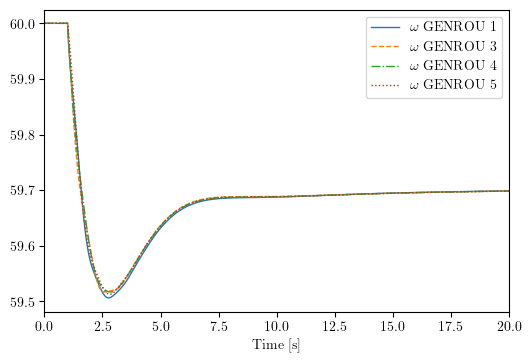

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [10]:
# Show the frequency response of online generators

# Refer to `plot` documentation by using `help(ss.TDS.plt.plot)` and `help(ss.TDS.plt.plot_data)`
ss.TDS.load_plotter()

ss.TDS.plt.plot(ss.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

## Adjusting Load to Compensate for the Generation Loss

Check the power of the lost generator by inspecting the power flow inputs:

In [11]:
ss.PV.as_df()

,idx,u,name,Sn,Vn,bus,busr,p0,q0,pmax,pmin,qmax,qmin,v0,vmax,vmin,ra,xs
uid,,,,,,,,,,,,,,,,,,
0,2,0.0,2,100.0,69.0,2,None,0.40,0.15,0.5,0.1,0.15,-0.40,1.03,1.4,0.6,0.0,0.13
1,3,0.0,3,100.0,69.0,3,None,0.40,0.15,0.5,0.1,0.15,-0.10,1.01,1.4,0.6,0.0,0.13
2,4,0.0,4,100.0,138.0,6,None,0.30,0.10,0.5,0.1,0.10,-0.06,1.03,1.4,0.6,0.0,0.12
3,5,0.0,5,100.0,69.0,8,None,0.35,0.10,0.5,0.1,0.10,-0.06,1.03,1.4,0.6,0.0,0.12


The tripped GENROU_2 correspond to the first PV (GENROU_1 corresponds to Slack). Thus, the lost active power is 0.40 pu.

Let's compensate for that by shedding 0.4 pu of active power load at t=2.0 s.

By checking the equation documentation of PQ (using `print(ss.PQ.doc())`, we can tell that the imposed active power for time-domain simulation is from `Ppf`, because we used the constant power model with `p2p = 1`.

```
Algebraic Equations

Name |   Type   |                RHS of Equation "0 = g(x, y)"                
-----+----------+-------------------------------------------------------------
 a   | ExtAlgeb | u * (dae_t <= 0) * (p0 * vcmp_zi + Rlb * vcmp_zl * v**2 +   
     |          | Rub * vcmp_zu * v**2) + u * (dae_t > 0) * (p2p * Ppf + p2i *
     |          | Ipeq * v + p2z * Req * v**2)                                
 v   | ExtAlgeb | u * (dae_t <= 0) * (q0 * vcmp_zi + Xlb * vcmp_zl * v**2 +   
     |          | Xub * vcmp_zu * v**2) + u * (dae_t > 0) * (q2q * Qpf + q2i *
     |          | Iqeq * v + q2z * Xeq * v**2)                                

```

`Ppf` may be different from `p0` specified in the data file.

In [12]:
# active power from power flow solution - make a copy

Ppf = np.array(ss.PQ.Ppf.v)

Ppf

array([0.217, 0.5  , 0.478, 0.076, 0.15 , 0.295, 0.09 , 0.035, 0.061,
       0.135, 0.2  ])

Reload the system and add the generator trip.

In [13]:
ss = andes.load(ieee14_raw, addfile=ieee14_dyr, setup=False)

ss.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))
ss.setup()
ss.Toggler.u.v[[0, 1]] = 0


ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0
ss.PQ.pq2z = 0

ss.PFlow.run()

Working directory: "/home/hcui7/repos/andes/examples"


Loaded config from file "/home/hcui7/.andes/andes.rc"


Loaded generated Python code in "~/.andes/pycode".


Parsing input file "/home/hcui7/repos/andes/andes/cases/ieee14/ieee14.raw"...


  IEEE 14 BUS TEST CASE


  03/06/14 CONTO           100.0  1962 W


Input file parsed in 0.0104 seconds.


Parsing additional file "/home/hcui7/repos/andes/andes/cases/ieee14/ieee14.dyr"...


Addfile parsed in 0.1274 seconds.


IEEEST <IEEEST_1> added BusFreq <BusFreq_1> linked to bus <3.0>


ST2CUT <ST2CUT_2> added BusFreq <BusFreq_2> linked to bus <1.0>


ST2CUT <ST2CUT_3> added BusFreq <BusFreq_3> linked to bus <2.0>


System internal structure set up in 0.0378 seconds.


-> System connectivity check results:


  No islanded bus detected.


  A total of 1 island(s) detected.


  Each island has a slack bus correctly defined and enabled.



-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
 Sparse addition: Fast in-place (kvxopt)


Power flow initialized.


0: |F(x)| = 0.5605182134


1: |F(x)| = 0.006202200332


2: |F(x)| = 5.819382827e-06


3: |F(x)| = 6.957087684e-12


Converged in 4 iterations in 0.0070 seconds.


Report saved to "ieee14_out.txt" in 0.0010 seconds.


True

But let's run to 2 seconds.

In [14]:
ss.TDS.config.tf = 2.0

ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-2.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


Initialization for dynamics was successful in 0.0221 seconds.


  0%|                                          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.
 50%|████████████████                | 50/100 [00:00<00:00, 818.00%/s]

 53%|████████████████▉               | 53/100 [00:00<00:00, 470.58%/s]

100%|███████████████████████████████| 100/100 [00:00<00:00, 165.33%/s]

Simulation completed in 0.6054 seconds.


Outputs to "ieee14_out.lst" and "ieee14_out.npz".


Outputs written in 0.0066 seconds.


True

In [15]:
# all `Ppf` before shedding

ss.PQ.Ppf.v

array([0.217, 0.5  , 0.478, 0.076, 0.15 , 0.295, 0.09 , 0.035, 0.061,
       0.135, 0.2  ])

And then apply the load shedding on buses 2, 3, 4, 5, 6, 9.

In [16]:
shed_buses = [2, 3, 4, 5, 6, 9]

# find the `idx` of the loads on these buses

pq_shed_idx = ss.PQ.find_idx(keys='bus', values=shed_buses)
pq_shed_idx

['PQ_1', 'PQ_2', 'PQ_3', 'PQ_4', 'PQ_5', 'PQ_6']

In [17]:
# get `Ppf` on these buses before shedding

pq_p = ss.PQ.get(src='Ppf', idx=pq_shed_idx, attr='v')
pq_p

array([0.217, 0.5  , 0.478, 0.076, 0.15 , 0.295])

In [18]:
pq_p_new = pq_p - 0.4 / len(shed_buses)

ss.PQ.set(src='Ppf', idx=pq_shed_idx, attr='v', value=pq_p_new)

True

In [19]:
# double check

ss.PQ.Ppf.v

array([0.15033333, 0.43333333, 0.41133333, 0.00933333, 0.08333333,
       0.22833333, 0.09      , 0.035     , 0.061     , 0.135     ,
       0.2       ])

  0%|                                          | 0/100 [00:00<?, ?%/s]

 13%|███▉                          | 13.0/100 [00:00<00:00, 118.78%/s]

 25%|███████▊                       | 25.0/100 [00:00<00:02, 36.39%/s]

 32%|█████████▉                     | 32.0/100 [00:00<00:02, 31.88%/s]

 37%|███████████▍                   | 37.0/100 [00:01<00:02, 31.08%/s]

 41%|████████████▋                  | 41.0/100 [00:01<00:01, 30.78%/s]

 45%|█████████████▉                 | 45.0/100 [00:01<00:01, 30.19%/s]

 49%|███████████████▏               | 49.0/100 [00:01<00:01, 30.65%/s]

 53%|████████████████▍              | 53.0/100 [00:01<00:01, 31.11%/s]

 57%|█████████████████▋             | 57.0/100 [00:01<00:01, 31.17%/s]

 61%|██████████████████▉            | 61.0/100 [00:01<00:01, 31.86%/s]

 65%|████████████████████▏          | 65.0/100 [00:02<00:01, 28.70%/s]

 68%|█████████████████████          | 68.0/100 [00:02<00:01, 27.87%/s]

 72%|██████████████████████▎        | 72.0/100 [00:02<00:00, 29.08%/s]

 76%|███████████████████████▌       | 76.0/100 [00:02<00:00, 30.46%/s]

 80%|████████████████████████▊      | 80.0/100 [00:02<00:00, 28.00%/s]

 83%|█████████████████████████▋     | 83.0/100 [00:02<00:00, 27.68%/s]

 86%|██████████████████████████▋    | 86.0/100 [00:02<00:00, 27.73%/s]

 90%|███████████████████████████▉   | 90.0/100 [00:02<00:00, 29.84%/s]

 94%|█████████████████████████████▏ | 94.0/100 [00:02<00:00, 31.73%/s]

 98%|██████████████████████████████▍| 98.0/100 [00:03<00:00, 31.05%/s]

100%|██████████████████████████████| 100.0/100 [00:03<00:00, 30.66%/s]

Simulation completed in 3.2626 seconds.


Outputs to "ieee14_out.lst" and "ieee14_out.npz".


Outputs written in 0.0407 seconds.


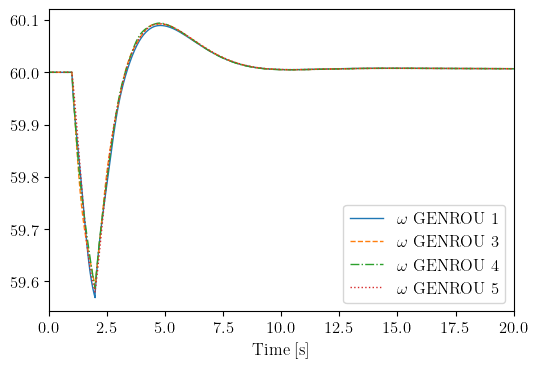

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [20]:
ss.TDS.config.tf = 20

ss.TDS.run()


ss.TDS.plt.plot(ss.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

In [21]:
!andes misc -C


    _           _         | Version 1.4.2.post116.dev0+g832274a7
   /_\  _ _  __| |___ ___ | Python 3.9.6 on Linux, 09/26/2021 05:42:04 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

"/home/hcui7/repos/andes/examples/kundur_out.lst" removed.
"/home/hcui7/repos/andes/examples/ieee14_out.lst" removed.
"/home/hcui7/repos/andes/examples/kundur_out.txt" removed.
"/home/hcui7/repos/andes/examples/kundur_full_out.txt" removed.
"/home/hcui7/repos/andes/examples/kundur_full_out.npz" removed.
"/home/hcui7/repos/andes/examples/kundur_out.npz" removed.
"/home/hcui7/repos/andes/examples/ieee14_out.npz" removed.
"/home/hcui7/repos/andes/examples/kundur_full_out.lst" removed.


The result shows the generator speed (frequency) returns to 60 Hz after load shedding. 